<div style="background-color: lightblue; padding: 30px;">
    
# Digital House - Data Science a Distancia

## Proyecto Final Integrador

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
    
<p style="text-align:right;">Agosto 2022</p>

---
</div>    

---
## Objetivo del Trabajo Final Integrador

<h4 style="text-align:center;">Demostrar que aprendimos conceptos y desarrollamos habilidades para obtener un modelo de aprendizaje automático que razonablemente predice un valor</h4>

### Escenario

Trabajamos como científicos de datos para una compañía; para consolidar nuestra posición presentamos el prototipo de un producto / servicio que permita transformar organizaciones al modelo Data-Driven Organization

### Requisitos del Trabajo Final Integrador

- Utilizar modelos de regresión o clasificación (es opcional)
- Evaluar modelos mediante ensemble, bagging o boosting
- Realizar selección de hiperparámetros
- Implementar pipeline al menos con algunos pasos del preprocesamiento
- Analizar importancia de características
- Serializar el modelo con mejor desempeño

### Entregables del Trabajo Final Integrador
#### Técnico (Jupyter Notebook)

1. Introducción y planteo del problema
2. Técnicas a utilizar y detalle del conjunto de datos
3. Desarrollo del análisis, visualizaciones, resultados de modelos
4. Detalle de hallazgos, conclusiones y recomendaciones

#### Presentación (audiencia NO TÉCNICA)

1. Resumen del problema
2. Métodos utilizados
3. Principales resultados

### Aspectos técnicos

La notebook se ejecuta correctamente en una instalación estándar de Anaconda versión *4.13.0 build  3.21.6, Python 3.9.7*

Deben asegurarse de tener la última versión de scikit-learn, pueden actualizar a la última versión accediendo a la consola de Anaconda y ejecutando:

    conda upgrade -c conda-forge scikit-learn
    
o accediendo a una terminal del sistema operativo y ejectutar:

    python -m pip install scikit-learn --upgrade


También hacen falta las siguientes librerías (en el enlace está la información para su instalación):

- [XGBoost](https://xgboost.readthedocs.io/en/stable/install.html)

---

---
<a id="Content"></a>
## Contenido

<div>
<dl style="display:block; margin-top:1em; margin-bottom:1em; margin-left:2em; margin-right:0;">
    <dt>1. Introducción y planteo del problema</dt>
    <dd>1.1. asdfasdf</dd>
    <dd>1.2. asdfad</dd>
    <dd><br/></dd>
    <dt>2. Técnicas a utilizar y detalle del conjunto de datos</dt>
    <dd><a href="#TechniquesDescription_1">2.1. Técnicas utilizadas</a></dd>
    <dd><a href="#DatasetDescription_1">2.2. Descripción de los datos</a></dd>
    <dd><br/></dd>
    <dt>3. Desarrollo del análisis, visualizaciones, resultados de modelos</dt>
    <dd><a href="#ExploratoryDataAnalysis_3_1">3.1. Correlaciones entre datos básicos</a></dd>
    <dd><a href="#ExploratoryDataAnalysis_3_2">3.2. Correlaciones con palabras frecuentes y días de publicación</a></dd>
    <dd><a href="#ExploratoryDataAnalysis_3_3">3.3. Relación de la cantidad de comentarios obtenidos según conteo de publicaciones</a></dd>
    <dd><br/></dd>
    <dd><a href="#ProofOfConcept_3_4_1">3.4. Modelos de regresión</a></dd>
    <dd><a href="#ProofOfConcept_3_4_1">3.4.1. Prueba de concepto para modelos de regresión</a></dd>
    <dd><a href="#GridSearch_Evaluate_3_4_2">3.4.2. Evaluación de hiper parámetros para XGBRegressor</a></dd>
    <dd><a href="#Evaluate_Regression_Model_3_4_3">3.4.3. Evaluación del modelo de regresión</a></dd>
    <dd><br/></dd>
    <dd><a href="#ProofOfConcept_3_5_1">3.5. Modelos de clasificación</a></dd>
    <dd><a href="#ProofOfConcept_3_5_1">3.5.1. Prueba de concepto para modelos de clasificación</a></dd>
    <dd><a href="#GridSearch_Evaluate_3_5_2">3.5.2. Evaluación de hiper parámetros para XGBClassifier</a></dd>
    <dd><a href="#Evaluate_Clasification_Model_3_5_3">3.5.3. Evaluación del modelo de clasificación</a></dd>
    <dd><br/></dd>
    <dd><a href="#FeatureImportance_3_6">3.6. Importancia de características</a></dd>
    <dd><br/></dd>
    <dt>4. Detalle de hallazgos, conclusiones y recomendaciones</dt>
    <dd><a href="#4_1">4.1. </a></dd>
    <dd><a href="#4_2">4.2. </a></dd>
</dl>
<br/>
</div>




---

---

---
<a id="NecessaryLibraries"></a>
#### Librerías Necesarias


In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 16

# to use HTML codes within IPpython.display function
from IPython.display import HTML

# to keep only 4 digits
ROUND = lambda v : round(v, 4)

# to interact with operating system
import os
import time

# to scale data
from sklearn.preprocessing import StandardScaler

# to use in proof of concept for regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to tune hiperparameters
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# to use in proof of concept for classification models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# to show classification models results
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to evaluate classification models
from sklearn.metrics import roc_auc_score

# to show classification models ROC AUC
from sklearn.metrics import RocCurveDisplay

In [2]:
SAVE_FIGURES = True
# save_models

In [3]:
if not os.path.exists('./figs') :
    os.makedirs('./figs')

---
<a id="UsefulFunctions"></a>
#### Funciones útiles


In [4]:
def get_blogData_features_names() :
    u'''
    '''
    return [
        'media_nc_total_before_BT', 'std_nc_total_before_BT', 'min_nc_total_before_BT', 'max_nc_total_before_BT', 'median_nc_total_before_BT', 
        'media_nc_24_before_BT', 'std_nc_24_before_BT', 'min_nc_24_before_BT', 'max_nc_24_before_BT', 'median_nc_24_before_BT', 
        'media_nc_between_24_48', 'std_nc_between_24_48', 'min_nc_between_24_48', 'max_nc_between_24_48', 'median_nc_between_24_48', 
        'media_nc_first_24_BT', 'std_nc_first_24_BT', 'min_nc_first_24_BT', 'max_nc_first_24_BT', 'median_nc_first_24_BT', 
        'media_nc_diff_24_48', 'std_nc_diff_24_48', 'min_nc_diff_24_48', 'max_nc_diff_24_48', 'median_nc_diff_24_48', 
        'media_nl_total_before_BT', 'std_nl_total_before_BT', 'min_nl_total_before_BT', 'max_nl_total_before_BT', 'median_nl_total_before_BT', 
        'media_nl_24_before_BT', 'std_nl_24_before_BT', 'min_nl_24_before_BT', 'max_nl_24_before_BT', 'median_nl_24_before_BT', 
        'media_nl_between_24_48', 'std_nl_between_24_48', 'min_nl_between_24_48', 'max_nl_between_24_48', 'median_nl_between_24_48', 
        'media_nl_first_24_BT', 'std_nl_first_24_BT', 'min_nl_first_24_BT', 'max_nl_first_24_BT', 'median_nl_first_24_BT', 
        'media_nl_diff_24_48', 'std_nl_diff_24_48', 'min_nl_diff_24_48', 'max_nl_diff_24_48', 'median_nl_diff_24_48', 
        'nc_total_before_BT', 'nc_24_before_BT', 'nc_between_24_48', 'nc_first_24_BT', 'nc_diff_24_48', 
        'nl_total_before_BT', 'nl_24_before_BT', 'nl_between_24_48', 'nl_first_24_BT', 'nl_diff_24_48', 
        'timelength_post_BT', 'length_post', 
        'fw_1', 'fw_2', 'fw_3', 'fw_4', 'fw_5', 'fw_6', 'fw_7', 'fw_8', 'fw_9', 'fw_10', 
        'fw_11', 'fw_12', 'fw_13', 'fw_14', 'fw_15', 'fw_16', 'fw_17', 'fw_18', 'fw_19', 'fw_20', 
        'fw_21', 'fw_22', 'fw_23', 'fw_24', 'fw_25', 'fw_26', 'fw_27', 'fw_28', 'fw_29', 'fw_30', 
        'fw_31', 'fw_32', 'fw_33', 'fw_34', 'fw_35', 'fw_36', 'fw_37', 'fw_38', 'fw_39', 'fw_40', 
        'fw_41', 'fw_42', 'fw_43', 'fw_44', 'fw_45', 'fw_46', 'fw_47', 'fw_48', 'fw_49', 'fw_50', 
        'fw_51', 'fw_52', 'fw_53', 'fw_54', 'fw_55', 'fw_56', 'fw_57', 'fw_58', 'fw_59', 'fw_60', 
        'fw_61', 'fw_62', 'fw_63', 'fw_64', 'fw_65', 'fw_66', 'fw_67', 'fw_68', 'fw_69', 'fw_70', 
        'fw_71', 'fw_72', 'fw_73', 'fw_74', 'fw_75', 'fw_76', 'fw_77', 'fw_78', 'fw_79', 'fw_80', 
        'fw_81', 'fw_82', 'fw_83', 'fw_84', 'fw_85', 'fw_86', 'fw_87', 'fw_88', 'fw_89', 'fw_90', 
        'fw_91', 'fw_92', 'fw_93', 'fw_94', 'fw_95', 'fw_96', 'fw_97', 'fw_98', 'fw_99', 'fw_100', 
        'fw_101', 'fw_102', 'fw_103', 'fw_104', 'fw_105', 'fw_106', 'fw_107', 'fw_108', 'fw_109', 'fw_110', 
        'fw_111', 'fw_112', 'fw_113', 'fw_114', 'fw_115', 'fw_116', 'fw_117', 'fw_118', 'fw_119', 'fw_120', 
        'fw_121', 'fw_122', 'fw_123', 'fw_124', 'fw_125', 'fw_126', 'fw_127', 'fw_128', 'fw_129', 'fw_130', 
        'fw_131', 'fw_132', 'fw_133', 'fw_134', 'fw_135', 'fw_136', 'fw_137', 'fw_138', 'fw_139', 'fw_140', 
        'fw_141', 'fw_142', 'fw_143', 'fw_144', 'fw_145', 'fw_146', 'fw_147', 'fw_148', 'fw_149', 'fw_150', 
        'fw_151', 'fw_152', 'fw_153', 'fw_154', 'fw_155', 'fw_156', 'fw_157', 'fw_158', 'fw_159', 'fw_160', 
        'fw_161', 'fw_162', 'fw_163', 'fw_164', 'fw_165', 'fw_166', 'fw_167', 'fw_168', 'fw_169', 'fw_170', 
        'fw_171', 'fw_172', 'fw_173', 'fw_174', 'fw_175', 'fw_176', 'fw_177', 'fw_178', 'fw_179', 'fw_180', 
        'fw_181', 'fw_182', 'fw_183', 'fw_184', 'fw_185', 'fw_186', 'fw_187', 'fw_188', 'fw_189', 'fw_190', 
        'fw_191', 'fw_192', 'fw_193', 'fw_194', 'fw_195', 'fw_196', 'fw_197', 'fw_198', 'fw_199', 'fw_200', 
        'monday_BT', 'tuesday_BT', 'wednesday_BT', 'thursday_BT', 'friday_BT', 'saturday_BT', 'sunday_BT', 
        'monday_post', 'tuesday_post', 'wednesday_post', 'thursday_post', 'friday_post', 'saturday_post', 'sunday_post', 
        'parents', 'min_parents', 'max_parents', 'media_parents', 'comments'
    ]


In [5]:
def read_blogData_train() :
    u''' Reads and prepare data from blog feedback data train set
    
    '''

    data = pd.read_csv('./data/blogData_train.csv', header=None)
    data.drop_duplicates(inplace=True)
    data.reset_index(drop=True, inplace=True)
    
    data.columns = get_blogData_features_names()
    
    return data


In [6]:

def read_blogData_test() :
    u''' Reads and prepare data from blog feedback data test set
    
    '''

    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    data_test_raw = pd.DataFrame()

    for filename in filelist :
        data_temp_raw = pd.read_csv(filename, header=None)
        data_temp_raw.drop_duplicates(inplace=True)
        data_test_raw = data_test_raw.append(data_temp_raw)

    return data_test_raw

In [7]:
def get_blogData_features_groups(data) :
    u''' Create a dictionary with some keys associates to list of features in the final work dataframe
    
    args:
        data : DataFrame
    
    return:
        dictionary with util features names
    
    '''
    columns = list(data.columns)

    features = dict()

    features['sd_nc_total_before_BT'] = columns[0:5]
    features['sd_nc_24_before_BT'] = columns[5:10]
    features['sd_nc_between_24_48'] = columns[10:15]
    features['sd_nc_first_24_BT'] = columns[15:20]
    features['sd_nc_diff_24_48'] = columns[20:25]
    
    features['sd_nl_total_before_BT'] = columns[25:30]
    features['sd_nl_24_before_BT'] = columns[30:35]
    features['sd_nl_between_24_48'] = columns[35:40]
    features['sd_nl_first_24_BT'] = columns[40:45]
    features['sd_nl_diff_24_48'] = columns[45:50]
    
    features['nc_total_before_BT'] = columns[50:51]
    features['nc_24_before_BT'] = columns[51:52]
    features['nc_between_24_48'] = columns[52:53]
    features['nc_first_24_BT'] = columns[53:54]
    features['nc_diff_24_48'] = columns[54:55]
    
    features['nl_total_before_BT'] = columns[55:56]
    features['nl_24_before_BT'] = columns[56:57]
    features['nl_between_24_48'] = columns[57:58]
    features['nl_first_24_BT'] = columns[58:59]
    features['nl_diff_24_48'] = columns[59:60]
    
    features['nc'] = columns[50:55]
    features['nl'] = columns[55:60]

    features['timelength_post_BT'] = columns[60:61]
    features['length_post'] = columns[61:62]

    features['frequent_word'] = columns[62:262]

    features['weekday_BT'] = columns[262:269]
    features['weekday_post'] = columns[269:276]
    features['parents'] = columns[276:280]
    features['comments'] = columns[280:281]

    return features


In [8]:


def set_figure(row, col, suptitle=None, y=0.98, fontsize='xx-large', fontweight='extra bold') :
    u''' Activate matplot figure setting size and super title
    '''
    
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, y=y, 
                     verticalalignment='center', fontsize=fontsize, fontweight=fontweight);
    return fig


def show_corr(data, target) :
    u''' Shows a correlation matrix of data features sorted by target feature values of correlation
    '''
    
    corr = data.corr()
    cols = corr[target].sort_values(ascending=False).keys()
    
    topc = corr.loc[cols, cols]
    mask = np.zeros_like(topc)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(data=topc, 
                cmap=sns.diverging_palette(h_neg=350, h_pos=150, center='light', as_cmap=True), 
                center=0, linewidths=1, annot=True, fmt=".3f", cbar=False, mask=mask)

    return

In [9]:

class Eval_Estimator :
    u'''
    '''

    def __init__(self, name, estimator, params=None, gs_param_grid=None) :
        self.name = name
        self.estimator = estimator
        self.params = params
        # attributes used in GridSearchCV
        self.gs_param_grid = gs_param_grid
        self.gs_estimator = None

        return        

#



---
<a id="TechniquesDescription_1"></a>
### 2.1. Técnicas utilizadas

- Mediante evaluación de correlación entre distintas características del conjunto de datos se presume aquellas que parecen ser las más relevantes en la predicción del resultado, las figuras 4 y 5 muestran las que resultan más interesantes

- Una prueba de concepto sobre modelos de regresión (aprendizaje supervisado) permite seleccionar Extreme Gradient Boosting como modelo candidato, la documentación del modelo facilita la selección de valores de diferentes hiper parámetros y mediante GridSearchCV se pudo hallar los que razonablemente sirven para este caso

- Con los datos provistos específicamente para la evaluación de modelos se determinó que la aproximación por regresión no es la adecuada; los valores de RMSE calculados con los datos de evaluación no satisfacen las expectativas; van de un mínimo de 5 comentarios a un máximo de 44 comentarios cuando el valor de "30 comentarios" resulta ser una cantidad de comentarios interesante en la estimación de un primer modelo.

- Una segunda prueba de concepto en esta oportunidad sobre modelos de clasificación (también de aprendizaje supervisado) permite seleccionar otra vez Extreme Gradient Boosting como modelo candidato; nuevamente la documentación del modelo facilita la selección de valores de diferentes hiper parámetros y mediante GridSearchCV (con varias horas de entrenamiento en diferentes instalaciones) se hallaron los que creemos sirven para este caso

- Nuevamente con los datos provistos para la evaluacíon de modelos se determinó que ....


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

---
<a id="DatasetDescription_1"></a>
### 2.2. Descripción de los Datos

Los datos originales se obtuvieron de [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/BlogFeedback) que corresponden a la publicación de Kristian Buza (2012) sobre [Feedback Prediction for Blogs](http://cs.bme.hu/~buza/pdfs/gfkl2012_blogs.pdf)

#### 2.2.1 Descripción de los datos para entrenamiento

El conjunto de datos se compone de **280 características** ("features") más el número de comentarios obtenidos ("target") y 49203 observaciones útiles, **no duplicadas**

*Las características son*:

- 0 a 49: Media, desviación estándar, mínimo, máximo y mediana de cada una de las características 
- 50 a 59 del origen o sitio de las publicaciones. El origen o sitio es la página web en la que se encuentra la publicación
- 50: Número total de comentarios antes de la fecha límite
- 51: Número de comentarios en las últimas 24 horas antes de la fecha límite
- 52: Número de comentarios en el período de tiempo transcurrido entre las 48 y 24 horas antes de la fecha límite
- 53: Número de comentarios en las primeras 24 horas después de realizar la publicación pero antes de de la fecha límite
- 54: Diferencia entre las características 51 y 52
- 55 a 59: Las mismas características indicadas para 50..54 pero referidas al número de enlaces (trackbacks)
- 60: Cantidad de “tiempo” entre el momento en que se realizó la publicación y la fecha límite
- 61: Longitud del texto de la publicación
- 62 a 261: Indicador binario para las 200 palabras más frecuentes en el texto de la publicación
- 262 a 268: Indicador binario del día de la semana (lunes a domingo) de la fecha límite
- 269 a 275: Indicador binario del día de la semana (lunes a domingo) de la fecha de publicación
- 276: Número de páginas padres, se considera página padre cuando la publicación es una réplica (trackback) de ella
- 277 a 279: Mínimo, máximo y media de comentarios en la página padre
- 280: Número de comentarios en las siguientes 24 horas de la fecha límite ("target")

#### 2.2.2 Descripción de los datos para evaluación de modelos

Para la evaluación de modelos **se cuenta con 60 archivos** con el mismo formato que el conjunto de datos de entrenamiento; **cada archivo coresponde a una fecha límite**.

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---


---
<a id="ExploratoryDataAnalysis_1"></a>

### Exploración y Análisis de Datos Básico 
---


In [10]:
data_train = read_blogData_train()

features = get_blogData_features_groups(data_train)
target = 'comments'


---

---
<a id="ExploratoryDataAnalysis_3_1"></a>
#### 3.1. Correlaciones entre datos básicos

- En las siguientes figuras se presenta la correlación entre el número de comentarios obtenidos **después de la fecha límite** y diferentes valores del número de comentarios antes de la fecha límite

- En **Figura 1** se presenta la correlación con el número total de comentarios anteriores; en **Figura 2** se presenta la correlación con el número total de comentarios anteriores y el número de enlaces de la publicación y en **Figura 3** se presenta la correlación con el número total de comentarios anteriores y sus descriptores estadísticos

- En esta última figura se debe destacar el valor de correlación de las características correspondientes a los descriptores estadísticos (mediana, media, …)

- En las **Figuras 4 y 5** se observa una mayor correlación entre el número de comentarios obtenidos después de la fecha límite y el número de comentarios en las 24 horas anteriores de la fecha límite así como los obtenidos entre las 24 y 48 horas anteriores a la fecha límite


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

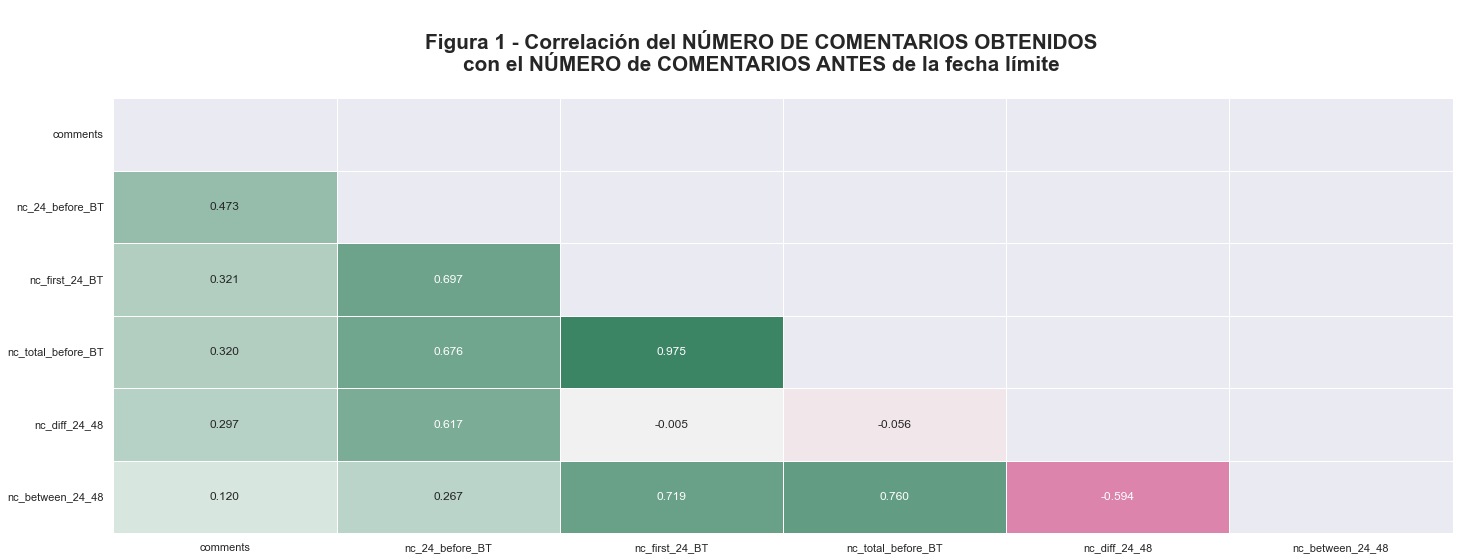

In [11]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 1' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTES de la fecha límite')
show_corr(data=data_train[features['nc'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 1.png', format='png')


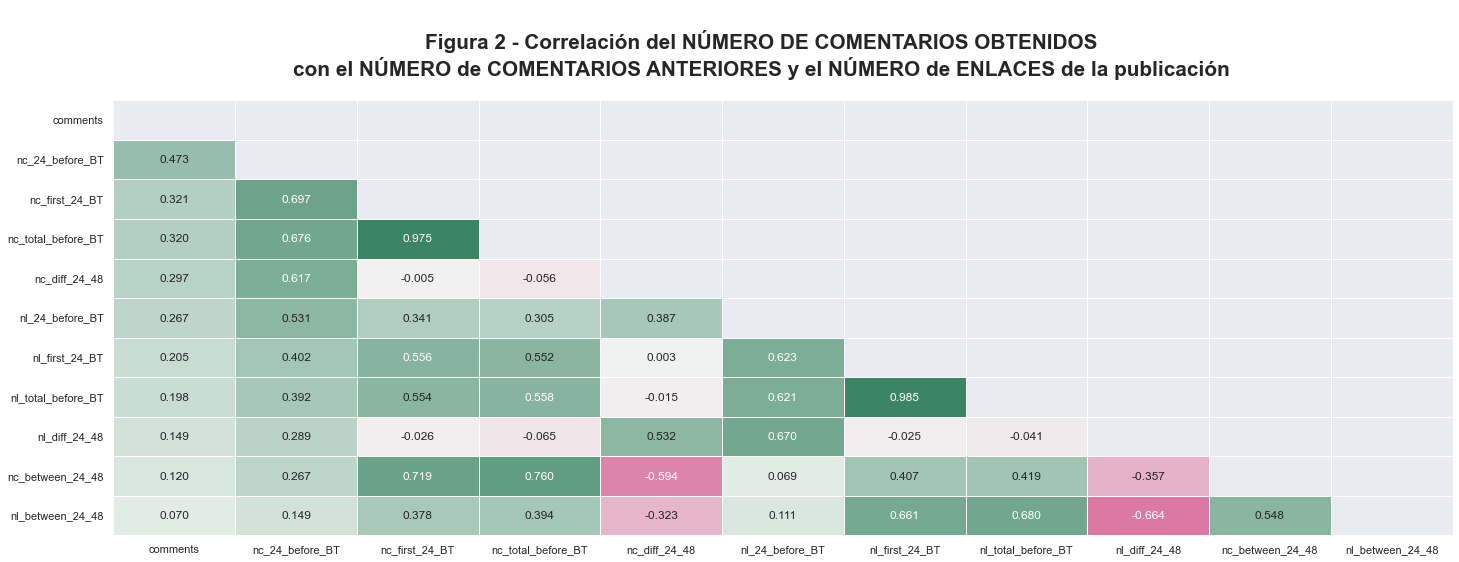

In [12]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 2' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO de COMENTARIOS ANTERIORES y el NÚMERO de ENLACES de la publicación')
show_corr(data=data_train[features['nc'] + features['nl'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 2.png', format='png')


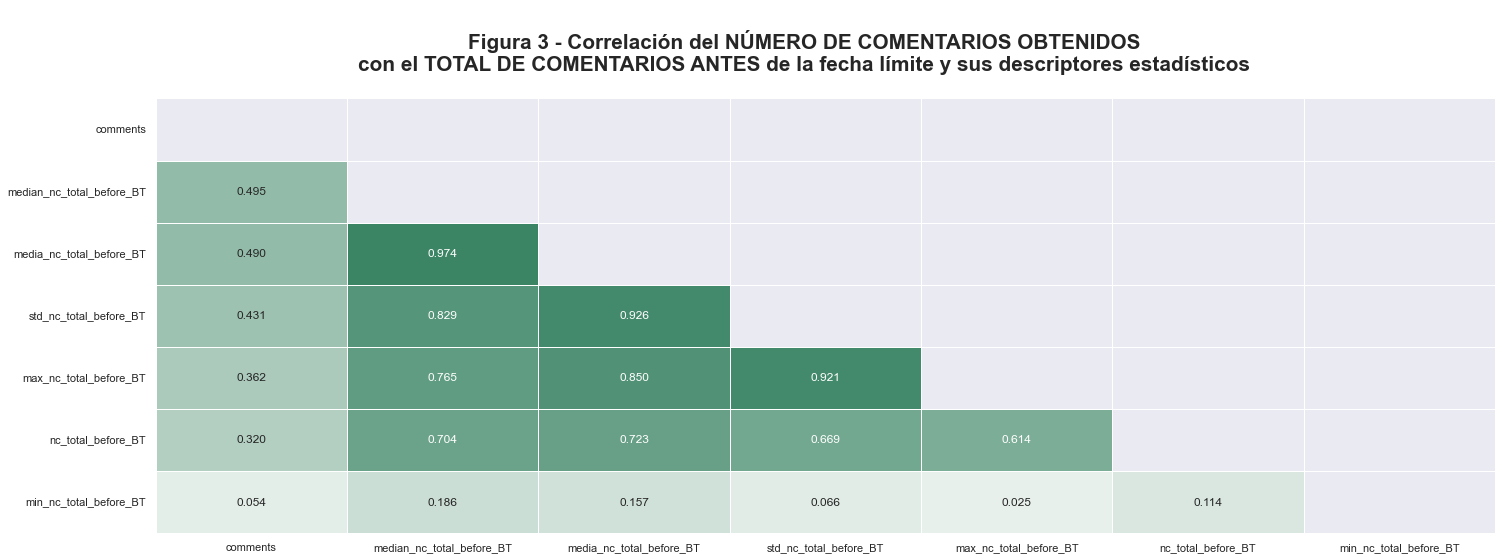

In [13]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 3' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el TOTAL DE COMENTARIOS ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_total_before_BT'] + features['sd_nc_total_before_BT'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 3.png', format='png')


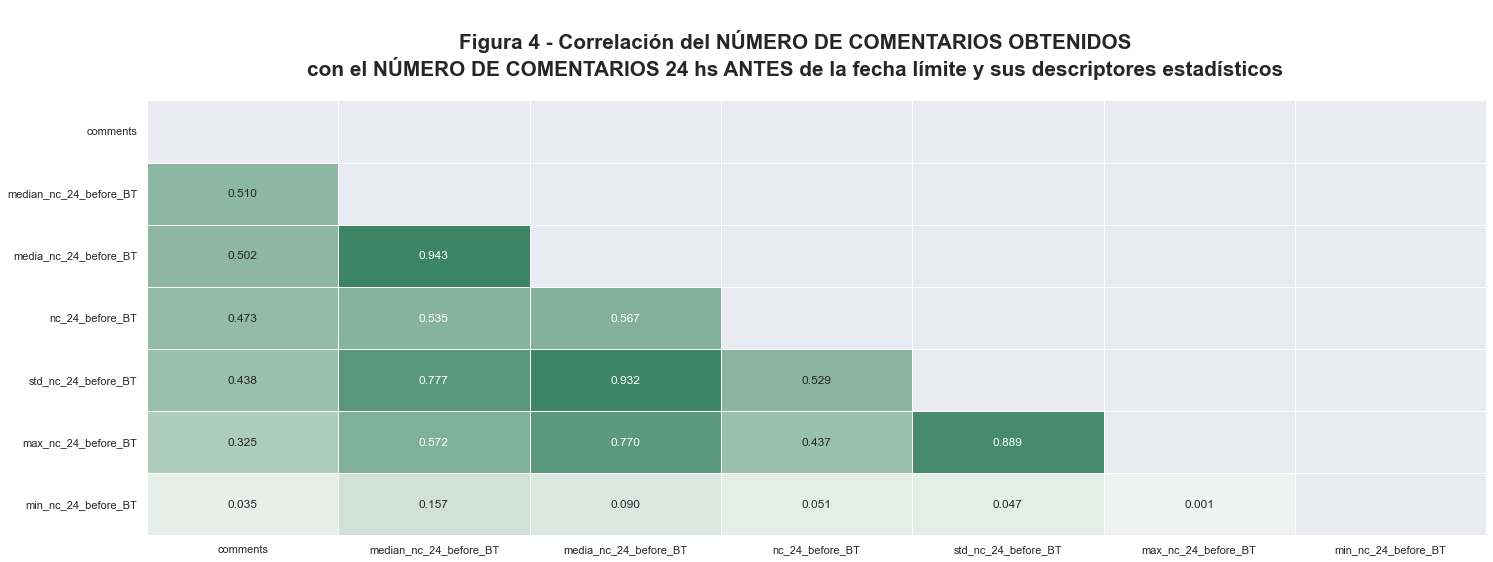

In [14]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 4' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS 24 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_24_before_BT'] + features['sd_nc_24_before_BT'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 4.png', format='png')


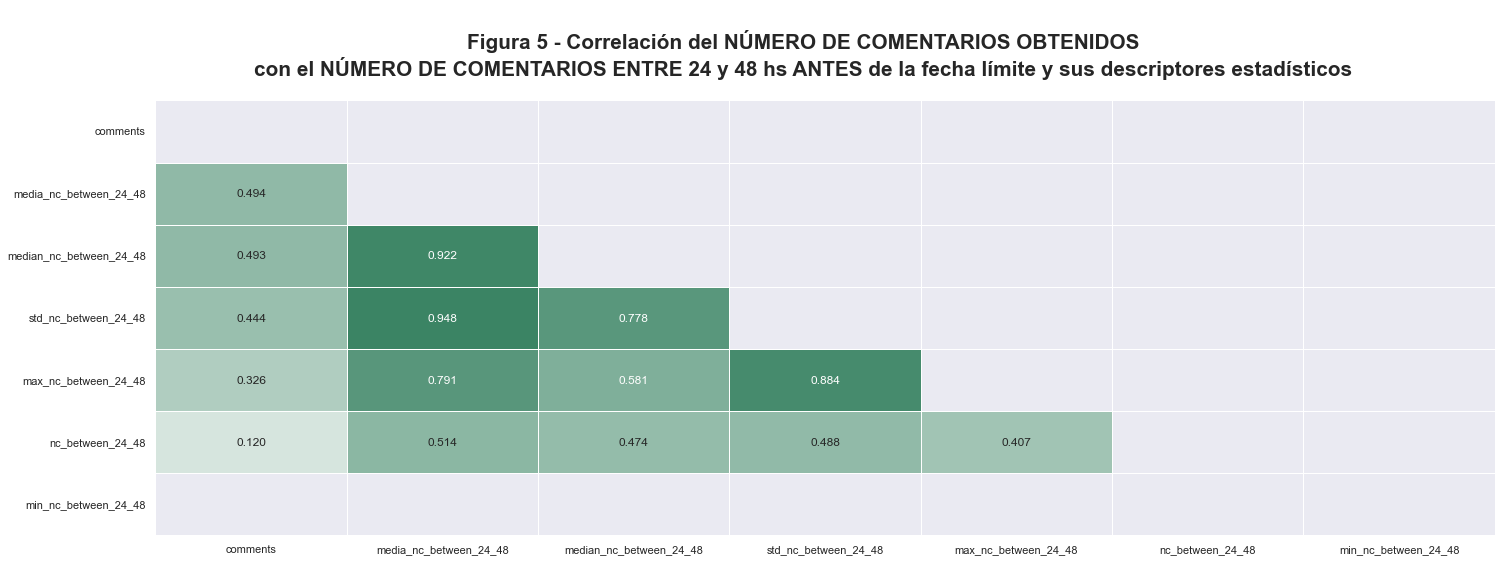

In [15]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 5' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con el NÚMERO DE COMENTARIOS ENTRE 24 y 48 hs ANTES de la fecha límite y sus descriptores estadísticos')
show_corr(data=data_train[features['nc_between_24_48'] + features['sd_nc_between_24_48'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 5.png', format='png')


---
<a id="ExploratoryDataAnalysis_3_2"></a>
#### 3.2. Correlaciones con palabras frecuentes y días de publicación

- En **Figura 6** se observa que la correlación del número de comentarios obtenidos después de la fecha límite es muy baja en relación a las palabras más utilizadas en el texto de la publicación

- En **Figura 7** se observa que la correlación del número de comentarios obtenidos después de la fecha límite también es muy baja en relación a los días de la semana en que se hizo la publicación así como la fecha límite misma


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

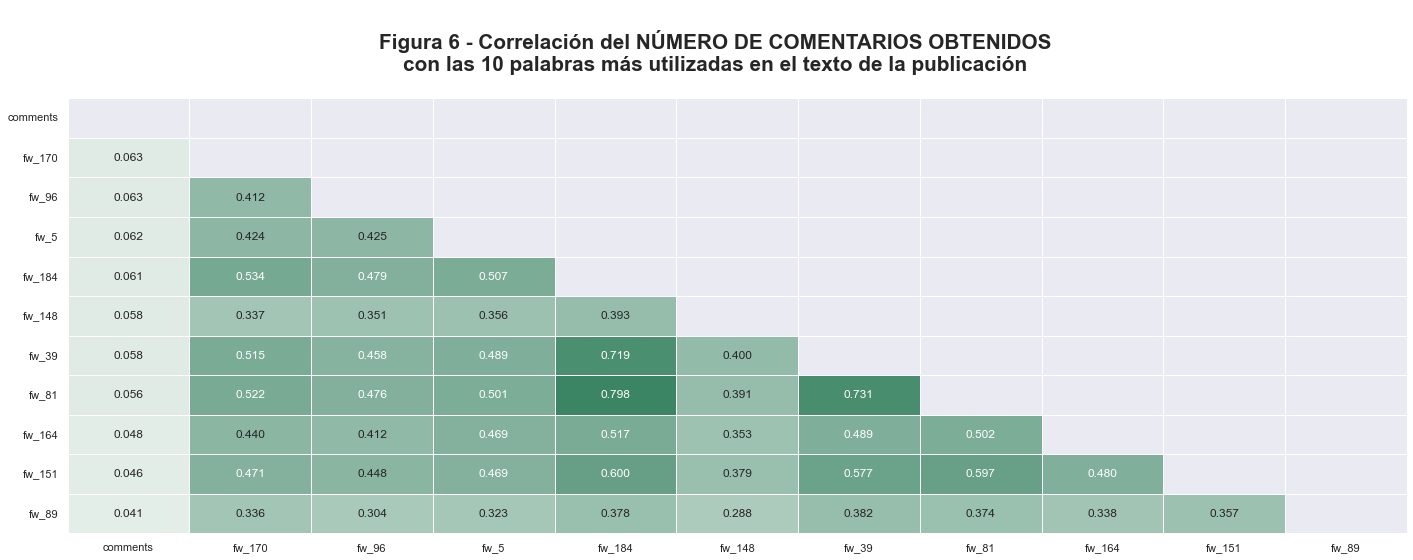

In [16]:

def get_frequent_word_counts_list(data) :
    u'''
    '''

    result = pd.DataFrame(columns=['count'], data=data.sum() )
    result.reset_index(drop=False, inplace=True)
    result.rename(columns={'index' : 'word'}, inplace=True)
    result.sort_values(by='count', ascending=False, inplace=True)
    
    return list(result['word'])


first_10_words = get_frequent_word_counts_list(data_train[features['frequent_word']])[:10]

fig = set_figure(24, 8, 
                 suptitle='\nFigura 6' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con las 10 palabras más utilizadas en el texto de la publicación')
show_corr(data=data_train[first_10_words + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 6.png', format='png')


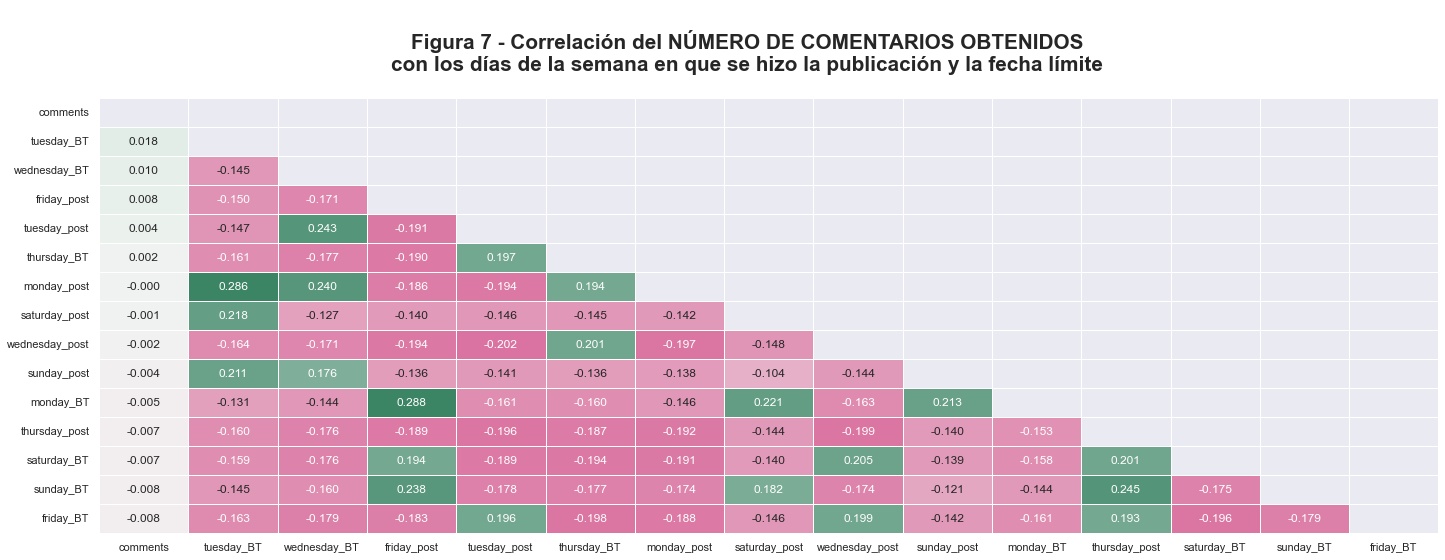

In [17]:

fig = set_figure(24, 8, 
                 suptitle='\nFigura 7' + ' - ' + \
                 'Correlación del NÚMERO DE COMENTARIOS OBTENIDOS' + '\n' + \
                 'con los días de la semana en que se hizo la publicación y la fecha límite')
show_corr(data=data_train[features['weekday_BT'] + features['weekday_post'] + [target]], target=target)

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 7.png', format='png')


---
<a id="ExploratoryDataAnalysis_3_3"></a>
#### 3.3. Relación de la cantidad de comentarios obtenidos según conteo de publicaciones

- En **Figura 8** se aprecia que son pocas (menos del 4%) las publicaciones que obtienen un número de comentarios mayor o igual a 30

- En **Figura 9** se presenta la información sobre publicaciones que obtienen un número de comentarios menor a 30

<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

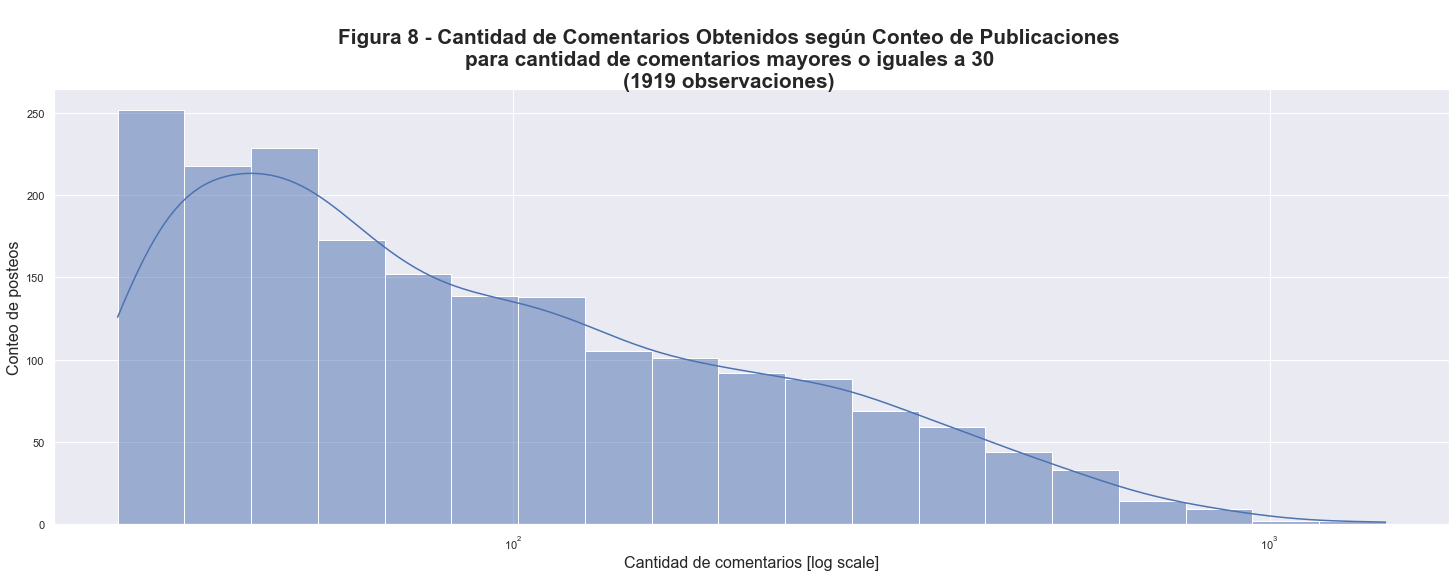

In [18]:
def get_obyc(data) :
    u'''
    '''
    temp1 = pd.DataFrame(data['comments'].value_counts())
    temp1.reset_index(inplace=True)
    temp1.columns = ['comments count', 'publications']
    temp1 = temp1.astype({'comments count':'int64'})
    return temp1

data_obyc = get_obyc(data_train)

set_figure(25, 8, 
           suptitle='\nFigura 8' + ' - ' + \
           'Cantidad de Comentarios Obtenidos según Conteo de Publicaciones' + '\n' + \
           'para cantidad de comentarios mayores o iguales a 30' + '\n' + \
           '(' + str(data_train[data_train['comments']>=30].shape[0]) + ' observaciones)', y=0.95,)
axs = sns.histplot(data=data_train[data_train['comments']>=30], x='comments', kde=True, log_scale=True);
axs.set_xlabel('Cantidad de comentarios [log scale]')
axs.set_ylabel('Conteo de posteos');

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 8.png', format='png')


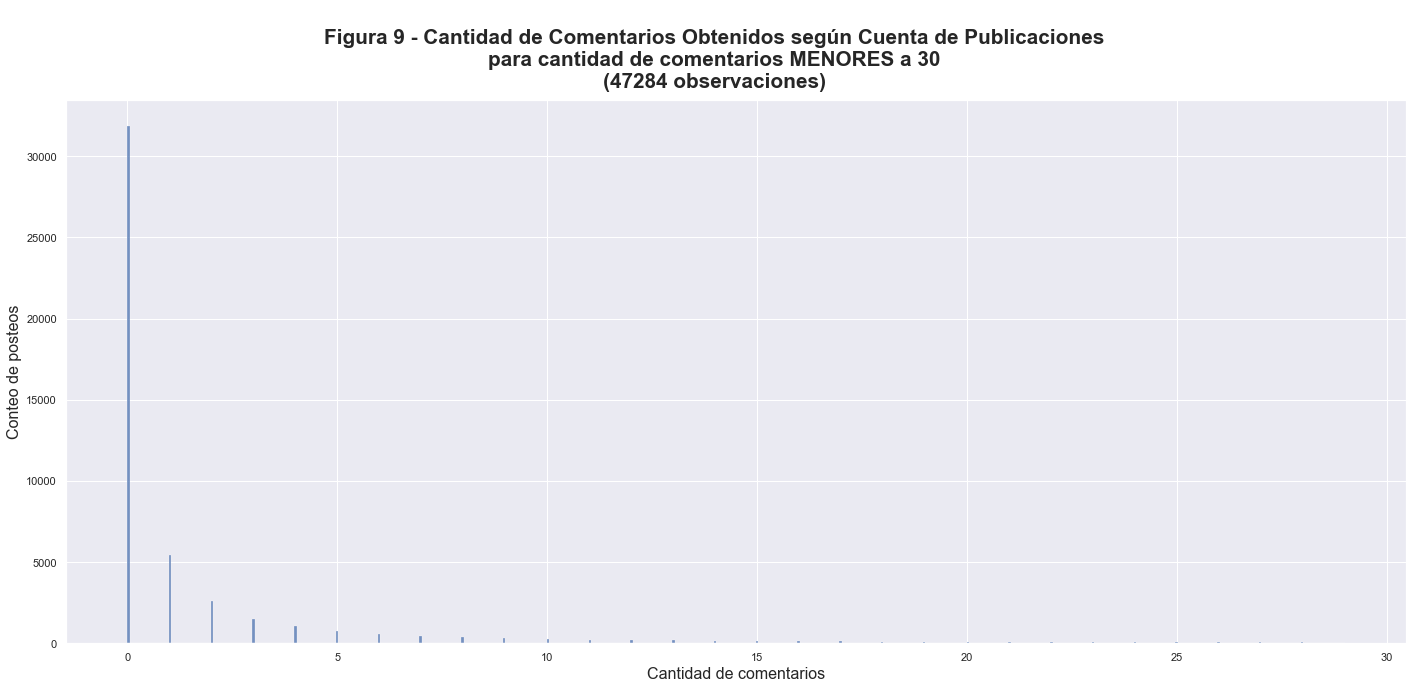

In [19]:
fig = set_figure(24, 10, 
           suptitle='\nFigura 9' + ' - ' + \
           'Cantidad de Comentarios Obtenidos según Cuenta de Publicaciones' + '\n' + \
           'para cantidad de comentarios MENORES a 30' + '\n' + \
           '(' + str(data_obyc[data_obyc['comments count']<30]['publications'].sum()) + ' observaciones)', y=0.95)
# sns.barplot(data=data_obyc[data_obyc['comments count']<30], y='comments count', x='publications', orient='v');
axs = sns.histplot(data=data_train[data_train['comments']<30], x='comments');
axs.set_xlabel('Cantidad de comentarios');
axs.set_ylabel('Conteo de posteos');

if SAVE_FIGURES :
    _ = plt.savefig('./figs/Figura 9.png', format='png')


---

---

---
<a id="ProofOfConcept_3_4_1"></a>
### 3.4.1. Prueba de concepto para modelos de regresión

En la prueba de concepto para modelos de regresión con parámetros por defecto se observa que:

- Es posible predecir el número de comentarios a obtener en las próximas 24 horas con un **error de ± 25 comentarios**

- El *mejor tiempo* de entrenamiento es para el modelo XGBoost Regressor, sin embargo los parámetros por defecto presentan *un modelo sobreajustado*


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

In [18]:
data_train = read_blogData_train()
data_test = read_blogData_test()

X_train = data_train.iloc[:,0:280].copy()
y_train = data_train.iloc[:,-1].copy()

X_test = data_test.iloc[:,0:280].copy()
y_test = data_test.iloc[:,-1].copy()

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [19]:

def regression_proof_of_concept() :
    u'''
    '''

# ---

    models = []
    models.append( Eval_Estimator(
        name='Linear Regression', 
        estimator=LinearRegression(
            n_jobs=-1, # use all processors
        ) 
    ) )

    models.append( Eval_Estimator(
        name='Random Forest Regressor', 
        estimator=RandomForestRegressor(
            n_jobs=-1, # use all processors
        ) 
    ) )

    models.append( Eval_Estimator(
        name='Gradient Boosting Regressor', 
        estimator=GradientBoostingRegressor() 
    ) )

    models.append( Eval_Estimator(
        name='XGBoost Regressor', 
        estimator=xgb.XGBRegressor(
            n_jobs=-1, # use all processors
        ) 
    ) )

# ---

    poc_results = pd.DataFrame(columns=['model', 'fit time', 'train RMSE', 'test RMSE'])

    for m in models :
        print('Prueba de concepto para', m.name, '... ', end='')
        fit_time = time.time()
        m.estimator.fit(X_train, y_train)
        fit_time = ROUND(time.time() - fit_time)
        print(fit_time, 'segundos')

        y_train_pred = m.estimator.predict(X_train)
        train_rmse = ROUND(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        y_test_pred = m.estimator.predict(X_test)
        test_rmse = ROUND(np.sqrt(mean_squared_error(y_test, y_test_pred)))

        poc_results = poc_results.append(
            pd.Series(
                data=[m.name, 
                      fit_time, 
                      train_rmse, 
                      test_rmse
                     ], 
                index=poc_results.columns), 
            ignore_index=True
        )

    # pd.options.display.max_colwidth = 500 
    display(poc_results)
    return

# comment to hide proof of concept
# regression_proof_of_concept()


---
<a id="GridSearch_Evaluate_3_4_2"></a>
### 3.4.2. Evaluación de hiper parámetros para XGBRegressor

- Regularizar el modelo XGBoost es fundamental dado que los parámetros por defecto presentan sobreajuste (overfitting)

- En la documentación se encuentra que los parámetros: **reg_alpha**, **reg_lambda** y **subsample** permiten controlar el overfitting

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [20]:

def gridsearch_evaluate(X_train, y_train) :
    u'''
    '''

# ---
    models = []

    models.append(
        Eval_Estimator(
            name='XGBoost Regressor L1 y L2',
            estimator=xgb.XGBRegressor(),
            gs_param_grid={
                'eval_metric' : ['rmse'], # root mean square error
                'gamma' : [1], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.2], # (eta) step size shrinkage
                'max_depth' : [8], # maximum depth of tree
                'n_estimators' : [1000], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['reg:squarederror'], # regression with squared loss
                'random_state' : [127], 
                'reg_alpha' : [1000], # L1 regularization
                'reg_lambda' : [1000], # L2 regularization
                'subsample' : [0.1], # prevents overfitting
            }
        )
    )
    
# ---

    gs_results = pd.DataFrame(columns=['model', 'best params', 'best score', 'train RMSE'])

    for m in models :
        scoring = 'neg_root_mean_squared_error'
        cv = StratifiedKFold(n_splits=2, random_state=11, shuffle=True)
        gs = GridSearchCV(
            estimator=m.estimator, # scikit-learn estimator interface
            param_grid=m.gs_param_grid, # dictionart key=parametrer, value=list of paraameter posible values
            scoring=scoring, # strategy to evaluate performance of cross-validated
            n_jobs=-2, # jobs in parallel -2 : all processors minus one
            refit=True, # refit estimator using best parameters
            cv=cv, # cross-validated splitting strategy
            return_train_score=False, # include training scores
            verbose=1 # display fold parameters, score, time, ...
        )
        
        print('Gridsearch para', m.name, '...')

        gs.fit(X_train, y_train)
        m.gs_estimator = gs.best_estimator_
        
        y_train_pred = gs.predict(X_train)
        gs_train_rmse = ROUND(np.sqrt(mean_squared_error(y_train, y_train_pred)))

        gs_results = gs_results.append(
            pd.Series(
                data=[m.name, 
                      gs.best_params_, 
                      gs.best_score_, 
                      gs_train_rmse
                     ], 
                index=gs_results.columns
                ),
            ignore_index=True
        )

    pd.options.display.max_colwidth = 500 
    display(gs_results.sort_values(by=['train RMSE'], axis='index'))
    
    return

# CAUTION !!!, it take a lot of time to run grid search
# comment to hide grid search evaluate
# gridsearch_evaluate(X_train, y_train)


---
<a id="Evaluate_Regression_Model_3_4_3"></a>
### 3.4.3. Evaluación del modelo de regresión

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [21]:
def evaluate_regression_model() :
    u'''
    '''

# ---
    data_raw = read_blogData_train()

    X_train = data_raw.iloc[:,0:280]
    y_train = data_raw.iloc[:,-1].copy()

    # X_test = test_raw.iloc[:,0:280]
    # y_test = test_raw.iloc[:,-1].copy()

    # X_train = X_train.iloc[:, 0:62].copy()
    # X_test = X_test.iloc[:, 0:62].copy()

    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    # X_test = scaler.transform(X_test)
# ---
    model = Eval_Estimator(
        name='XGBRegressor L1 y L2', 
        estimator=xgb.XGBRegressor(), 
        params={
            'eval_metric' : 'rmse', # root mean square error
            'gamma': 1, # (min_split_loss) minimum loss reduction
            'learning_rate': 0.2, # (eta) step size shrinkage
            'max_depth': 8, # maximum depth of tree
            'n_estimators': 1000, 
            'n_jobs': -1, # use all processors
            'objective' : 'reg:squarederror', # regression with squared loss
            'random_state': 127, 
            'reg_alpha': 1000, # (alpha) L1 regularization
            'reg_lambda': 1000, # (lambda) L2 regularization
            'subsample' : 0.1, # prevents overfitting
        }
    )
# ---
    model.estimator.set_params(**model.params)
    print('Entrenando modelo', model.name, '...')
    model.estimator.fit(X_train, y_train)
# ---
    class Eval_TestCase :
        u'''
        '''
        def __init__(self, case, data) :
            self.case = case
            self.data = data
            return    
# ---
    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    caselist = []
    for filename in filelist :
        temp_raw = pd.read_csv(filename, header=None)
        temp_raw.drop_duplicates(inplace=True)
        
        pos = filename.index('2012')
        caselist.append( Eval_TestCase(filename[pos: pos+10], temp_raw) )
# ---
    results = pd.DataFrame(columns=['case', 'count', 'y mean', 'y std', 'y min', 'y max', 'RMSE'])

    for e in caselist :
        X = e.data.iloc[:,0:280]
        y = e.data.iloc[:,-1]
        X = scaler.transform(X)
        p = model.estimator.predict(X)
        rmse = ROUND(np.sqrt(mean_squared_error(y, p)))

        results = results.append(
            pd.Series(
                data=[e.case, 
                      y.shape[0], 
                      ROUND(y.mean()), 
                      ROUND(y.std()), 
                      ROUND(y.min()), 
                      ROUND(y.max()), 
                      rmse
                     ], 
                index=results.columns), 
            ignore_index=True
        )
        
    return results
# ---


In [22]:
# comment to hide evaluate of regression model
# results = evaluate_regression_model()
# display(results.sample(5))
# display(results[['RMSE']].describe().transpose())

---


---
<a id="ProofOfConcept_3_5_1"></a>
### 3.5.1. Prueba de concepto para modelos de clasificación

En la prueba de concepto para modelos de clasificación con parámetros por defecto se observa que:

- ???

- El *mejor tiempo* de entrenamiento es para el modelo ???


<p style="text-align:right;"><a href="#Content">Contenido</a></p>

---

In [23]:

# to_classes = lambda v : 0 if v < 30 else (1 if v < 90 else (2 if v < 150 else (3 if v < 210 else 4)))
# to_classes = lambda v : 0 if v < 30 else (1 if v < 90 else 2)
to_classes = lambda v : 0 if v < 30 else 1


In [24]:

data_train = read_blogData_train()
data_test = read_blogData_test()

X_train = data_train.iloc[:,0:280].copy()
y_train = data_train.iloc[:,-1].copy()
y_train = y_train.apply(to_classes)

X_test = data_test.iloc[:,0:280].copy()
y_test = data_test.iloc[:,-1].copy()
y_test = y_test.apply(to_classes)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


              precision    recall  f1-score   support

           0   0.995575  0.009517  0.018854     47284
           1   0.039322  0.998958  0.075666      1919

    accuracy                       0.048107     49203
   macro avg   0.517449  0.504237  0.047260     49203
weighted avg   0.958280  0.048107  0.021069     49203



              precision    recall  f1-score   support

           0   0.951613  0.008684  0.017211      6794
           1   0.034270  0.987603  0.066242       242

    accuracy                       0.042354      7036
   macro avg   0.492942  0.498144  0.041726      7036
weighted avg   0.920061  0.042354  0.018898      7036



              precision    recall  f1-score   support

           0   0.969132  0.997970  0.983339     47284
           1   0.812500  0.216780  0.342246      1919

    accuracy                       0.967502     49203
   macro avg   0.890816  0.607375  0.662793     49203
weighted avg   0.963023  0.967502  0.958336     49203



              precision    recall  f1-score   support

           0   0.968607  0.999117  0.983626      6794
           1   0.785714  0.090909  0.162963       242

    accuracy                       0.967879      7036
   macro avg   0.877161  0.545013  0.573294      7036
weighted avg   0.962317  0.967879  0.955399      7036



              precision    recall  f1-score   support

           0   0.981930  0.994078  0.987967     47284
           1   0.790105  0.549244  0.648017      1919

    accuracy                       0.976729     49203
   macro avg   0.886017  0.771661  0.817992     49203
weighted avg   0.974448  0.976729  0.974708     49203



              precision    recall  f1-score   support

           0   0.979396  0.993524  0.986409      6794
           1   0.694444  0.413223  0.518135       242

    accuracy                       0.973565      7036
   macro avg   0.836920  0.703373  0.752272      7036
weighted avg   0.969596  0.973565  0.970303      7036



              precision    recall  f1-score   support

           0   0.991539  0.998858  0.995185     47284
           1   0.965605  0.789995  0.869017      1919

    accuracy                       0.990712     49203
   macro avg   0.978572  0.894426  0.932101     49203
weighted avg   0.990528  0.990712  0.990264     49203



              precision    recall  f1-score   support

           0   0.979858  0.995290  0.987514      6794
           1   0.762963  0.425620  0.546419       242

    accuracy                       0.975696      7036
   macro avg   0.871410  0.710455  0.766966      7036
weighted avg   0.972398  0.975696  0.972342      7036



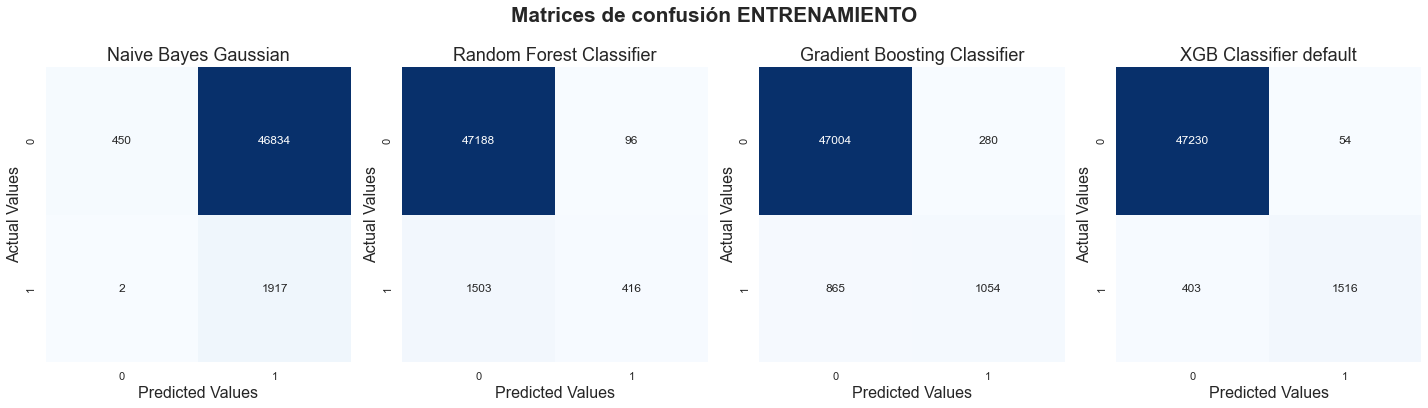

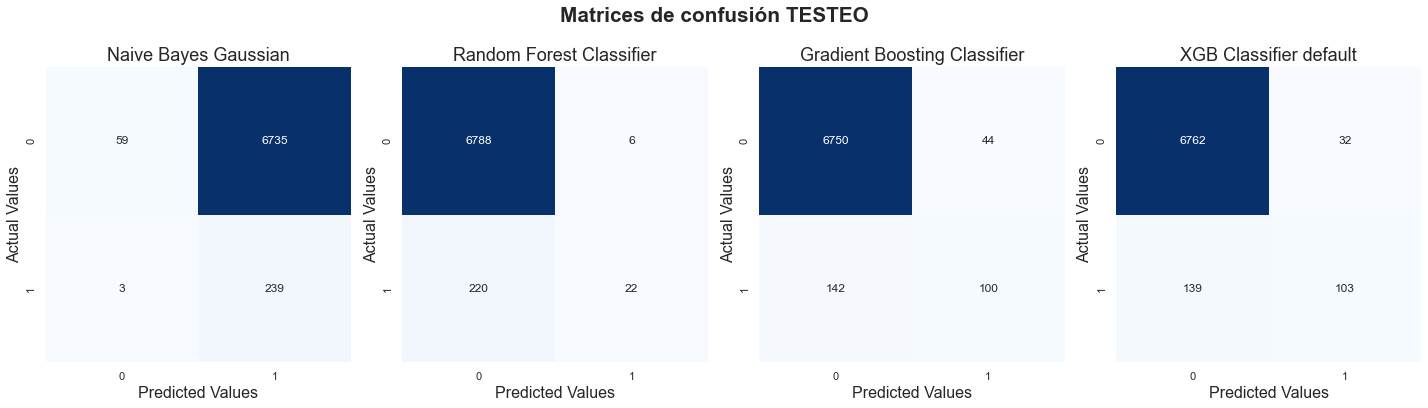

In [25]:

def classification_proof_of_concept() :
    u'''
    '''


# ---

    models = []
    models.append( Eval_Estimator(
        name='Naive Bayes Gaussian', 
        estimator=GaussianNB() 
    ) )

    models.append( Eval_Estimator(
        name='Random Forest Classifier', 
        estimator=RandomForestClassifier(
            n_estimators=100, 
            criterion='gini', 
            max_depth=3, 
            bootstrap=True, 
            n_jobs=-1, 
            max_samples=0.3, 
            random_state=127
        ) 
    ) )

    models.append( Eval_Estimator(
        name='Gradient Boosting Classifier', 
        estimator=GradientBoostingClassifier(
            # loss='log_loss', # loss function to optimize ???
            learning_rate=0.1, # contribution of each tree
            n_estimators=100, # large values -> better performance
            subsample=1, #  values < 1.0 -> low variance and high bias
            criterion='friedman_mse', # measure the quality of a split
            max_depth=3, # tree depth limits the number of nodes
            random_state=127
        )  
    ) )

    models.append( Eval_Estimator(
        name='XGB Classifier default', 
        estimator=xgb.XGBClassifier(
            eval_metric='auc', # 
            n_jobs=-1, # use all processors
            objective='binary:logistic', # for binary classification 
            # objective='multi:softprob', # for multi-class classification
            random_state=127, 
        ) 
    ) )
    
# ---

    for m in models :
        m.estimator.fit(X_train, y_train)
        
        y_pred = m.estimator.predict(X_train)
        display(HTML('<b>' + m.name + ' ENTRENAMIENTO</b>'))
        print(classification_report(y_train, y_pred, digits=6, target_names=None, output_dict=False))

        y_pred = m.estimator.predict(X_test)
        display(HTML('<b>' + m.name + ' TESTEO</b>'))
        print(classification_report(y_test, y_pred, digits=6, target_names=None, output_dict=False))

# ---
        
    fig = set_figure(20, 10, 'Matrices de confusión ENTRENAMIENTO')
    cols = 4
    rows = (len(models) // cols) + 1

    for i, m in enumerate(models) :
        y_pred = m.estimator.predict(X_train)

        plt.subplot(rows, cols, i+1)
        ax=sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap='Blues', cbar=False)
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        
    fig = set_figure(20, 10, 'Matrices de confusión TESTEO')
    cols = 4
    rows = (len(models) // cols) + 1
    
    for i, m in enumerate(models) :
        y_pred = m.estimator.predict(X_test)

        plt.subplot(rows, cols, i+1)
        ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues', cbar=False)
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')

    return

# comment to hide proof of concept
classification_proof_of_concept()


---
<a id="GridSearch_Evaluate_3_5_2"></a>
### 3.5.2. Evaluación de hiper parámetros para XGBClassifier

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [26]:

def classification_gridsearch_evaluate(X_train, y_train) :
    u'''
    '''
# ---
    models = []

    models.append(
        Eval_Estimator(
            name='XGBoost Classifier 1',
            estimator=xgb.XGBClassifier(),
            gs_param_grid={
                'eval_metric' : ['auc'], # 
                'gamma' : [0, 1], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.1], # (eta) step size shrinkage
                'max_depth' : [6], # maximum depth of tree
                'n_estimators' : [100], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['binary:logistic'], # for binary classification 
                'random_state' : [127], 
                # 'subsample' : [0.1, 0.5, 1], # prevents overfitting
            }
        )
    )
    models.append(
        Eval_Estimator(
            name='XGBoost Classifier 2',
            estimator=xgb.XGBClassifier(),
            gs_param_grid={
                'eval_metric' : ['auc'], # 
                'gamma' : [0], # (min_split_loss) minimum loss reduction
                'learning_rate' : [0.1], # (eta) step size shrinkage
                'max_depth' : [8, 10], # maximum depth of tree
                'n_estimators' : [500], 
                'n_jobs' : [-1], # use all processors
                'objective' : ['binary:logistic'], # for binary classification 
                'random_state' : [127], 
                # 'subsample' : [0.1, 0.5, 1], # prevents overfitting
            }
        )
    )
    
# ---

    gs_results = pd.DataFrame(columns=['model', 'best params', 'best score', 'train ROC AUC'])

    for m in models :
        scoring = 'roc_auc'
        cv = StratifiedKFold(n_splits=2, random_state=11, shuffle=True)
        gs = GridSearchCV(
            estimator=m.estimator, # scikit-learn estimator interface
            param_grid=m.gs_param_grid, # dictionart key=parametrer, value=list of paraameter posible values
            scoring=scoring, # strategy to evaluate performance of cross-validated
            n_jobs=-2, # jobs in parallel -2 : all processors minus one
            refit=True, # refit estimator using best parameters
            cv=cv, # cross-validated splitting strategy
            return_train_score=False, # include training scores
            verbose=3 # display fold parameters, score, time, ...
        )
        
        print('Gridsearch para', m.name, '...')

        gs.fit(X_train, y_train)
        m.gs_estimator = gs.best_estimator_
        
        y_train_pred = gs.predict(X_train)
        gs_train_roc_auc = ROUND(roc_auc_score(y_train, y_train_pred))

        gs_results = gs_results.append(
            pd.Series(
                data=[m.name, 
                      gs.best_params_, 
                      gs.best_score_, 
                      gs_train_roc_auc
                     ], 
                index=gs_results.columns
                ),
            ignore_index=True
        )

    pd.options.display.max_colwidth = 500 
    display(gs_results.sort_values(by=['train ROC AUC'], axis='index'))
    
    # return

# CAUTION !!!, it take a lot of time to run grid search
# comment to hide grid search evaluate
# classification_gridsearch_evaluate(X_train, y_train)


---
<a id="Evaluate_Clasification_Model_3_5_3"></a>
### 3.5.3. Evaluación del modelo de clasificación

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [27]:

def evaluate_classification_model() :
    u'''
    '''
# ---
    data_raw = read_blogData_train()
    # test_raw = blogData_test_read()

    X_train = data_raw.iloc[:,0:280]
    y_train = data_raw.iloc[:,-1].copy()
    y_train = y_train.apply(to_classes)

    # X_test = test_raw.iloc[:,0:280]
    # y_test = test_raw.iloc[:,-1].copy()

    # X_train = X_train.iloc[:, 0:62].copy()
    # X_test = X_test.iloc[:, 0:62].copy()

    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    # X_test = scaler.transform(X_test)
# ---
    model = Eval_Estimator(
        name='XGBoost Classifier', 
        estimator=xgb.XGBClassifier(), 
        params={
            'eval_metric' : 'auc', # 
            'gamma' : 0, # (min_split_loss) minimum loss reduction
            'learning_rate' : 0.0001, # (eta) step size shrinkage
            'max_delta_step' : 1e6, # extremely imbalanced
            'max_depth' : 20, # maximum depth of tree
            'n_estimators' : 500, 
            'n_jobs' : -1, # use all processors
            'objective' : 'binary:logistic', # for binary classification 
            'random_state' : 127, 
            'verbosity' : 0, 
        }
    )
# ---
    model.estimator.set_params(**model.params)
    print('Entrenando modelo', model.name, '...')
    print(model.estimator.get_params())
    model.estimator.fit(X_train, y_train)
# ---
    class Eval_TestCase :
        u'''
        '''
        def __init__(self, case, data) :
            self.case = case
            self.data = data
            self.y_test = None
            self.y_pred = None
            return    
# ---
    filepath = './data/test/'
    filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]

    caselist = []
    for filename in filelist :
        temp_raw = pd.read_csv(filename, header=None)
        temp_raw.drop_duplicates(inplace=True)
        
        pos = filename.index('2012')
        caselist.append( Eval_TestCase(filename[pos: pos+10], temp_raw) )
# ---
    results = pd.DataFrame(columns=['case', 'count', 'ROC AUC', 'y_test', 'y_pred'])

    for e in caselist :
        X = e.data.iloc[:,0:280]
        y = e.data.iloc[:,-1]
        y = y.apply(to_classes)
        X = scaler.transform(X)
        p = model.estimator.predict(X)
        
        e.y_test = y
        e.y_pred = p
        
        try :
            roc_auc = ROUND(roc_auc_score(y, p))
        except :
            rec_auc = -1

        results = results.append(
            pd.Series(
                data=[e.case, 
                      y.shape[0], 
                      roc_auc, 
                      y, p 
                     ], 
                index=results.columns), 
            ignore_index=True
        )
        
    return results
# ---    


# # comment to hide evaluate of regression model
# results = evaluate_classification_model()
# display(results[['case', 'count', 'ROC AUC']].sample(5))
# display(results[['ROC AUC']].describe().transpose())

In [28]:
def show_roc_curves(results) :
    
    fig = set_figure(row=24, col=40, suptitle='Areas bajo la curva', y=0.89, fontsize='x-large')
    cols = 6
    rows = (results.shape[0] // cols) + 1

    for i in range(results.shape[0]) :
        ax = plt.subplot(rows, cols, i+1)
        y = results.iloc[i]['y_test']
        p = results.iloc[i]['y_pred']

        RocCurveDisplay.from_predictions(y_true=y, y_pred=p, name='', ax=ax)
        plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01), linestyle='-.' )
        plt.xlabel('')
        plt.ylabel('')
    plt.show()
    return

# show_roc_curves(results)

In [29]:
# roc_auc_limit = 0.5
# mask = results['ROC AUC'] > roc_auc_limit
# print('Hay', results[mask].shape[0], 'Casos con ROC AUC mayor a', roc_auc_limit)
# show_roc_curves(results[mask])

---
<a id="FeatureImportance_3_6"></a>
### 3.6. Importancia de características

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

In [30]:
    data_raw = read_blogData_train()
    # test_raw = blogData_test_read()

    X_train = data_raw.iloc[:,0:280]
    y_train = data_raw.iloc[:,-1].copy()
    y_train = y_train.apply(to_classes)

    # X_test = test_raw.iloc[:,0:280]
    # y_test = test_raw.iloc[:,-1].copy()

    # X_train = X_train.iloc[:, 0:62].copy()
    # X_test = X_test.iloc[:, 0:62].copy()

    scaler = StandardScaler().fit(X_train)
    # X_train = scaler.transform(X_train)

    X_train = pd.DataFrame(
        data=scaler.transform(X_train), 
        columns=list(X_train.columns)
    )
    
    
    # X_test = scaler.transform(X_test)
# ---


In [32]:


    model = Eval_Estimator(
        name='XGBoost Classifier', 
        estimator=xgb.XGBClassifier(), 
        params={
            'eval_metric' : 'auc', # 
            'gamma' : 0, # (min_split_loss) minimum loss reduction
            'learning_rate' : 0.0001, # (eta) step size shrinkage
            'max_delta_step' : 1e6, # extremely imbalanced
            'max_depth' : 20, # maximum depth of tree
            'n_estimators' : 500, 
            'n_jobs' : -1, # use all processors
            'objective' : 'binary:logistic', # for binary classification 
            'random_state' : 127, 
            'verbosity' : 0, 
        }
    )
# ---
    model.estimator.set_params(**model.params)
    print('Entrenando modelo', model.name, '...')
    print(model.estimator.get_params())
    model.estimator.fit(X_train, y_train)
# ---

Entrenando modelo XGBoost Classifier ...
{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'enable_categorical': False, 'gamma': 0, 'gpu_id': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.0001, 'max_delta_step': 1000000.0, 'max_depth': 20, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 500, 'n_jobs': -1, 'num_parallel_tree': None, 'predictor': None, 'random_state': 127, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': 0, 'eval_metric': 'auc'}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0001,
              max_delta_step=1000000.0, max_depth=20, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=127, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [33]:


def get_feature_importance(models, data_columns) :
    u'''
    
    '''
    
    result = pd.DataFrame(columns=['model'] + list(data_columns))
    
    for m in models :
        result = result.append(
            pd.Series(
                data=[m.name] + list(m.estimator.feature_importances_), 
                index=result.columns
            ), 
            ignore_index=True 
        )

    result = pd.DataFrame(result.mean(), columns=['rate'])
    result.reset_index(drop=False, inplace=True)
    result.rename(columns={'index' : 'feature'}, inplace=True)
    result.sort_values(by='rate', ascending=False, inplace=True)
    
    result.reset_index(drop=True, inplace=True)
    result['rank'] = result.index
    
    return result


In [47]:
def show_feature_importance(models, data_columns) :

    result = get_feature_importance(models, data_columns)
    result.rename(columns={'rate' : 'rate global', 'rank' : 'rank global'}, inplace=True)

    if len(models) > 1 :
        for m in models :
            temp = get_feature_importance([m], data_columns)
            result = result.merge(right=temp[['feature', 'rate', 'rank']], on='feature', how='inner', suffixes=(None, ' ' + m.name) )
    
    return result

show_feature_importance(models=[model], data_columns=X_train.columns)[:20]


,feature,rate global,rank global
0,nc_24_before_BT,0.122732,0
1,median_nc_total_before_BT,0.073042,1
2,media_nc_diff_24_48,0.066276,2
3,nc_diff_24_48,0.045481,3
4,media_nl_first_24_BT,0.040660,4
5,timelength_post_BT,0.035805,5
6,median_nc_first_24_BT,0.034947,6
7,media_nl_between_24_48,0.032491,7
8,std_nc_total_before_BT,0.025741,8
9,max_nc_total_before_BT,0.025512,9


In [41]:
# data_raw = read_blogData_train()

In [46]:
# X_train.columns = list(data_raw.columns)[0:280]

---
<a id="4_1"></a>
### 4.1. ...

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---

---
<a id="4_2"></a>
### 4.2. ...

- ???

<p style="text-align:right;"><a href="#Content">Contenido</a></p>


---